# Recommendation Bandits

In [1]:
from economiarl import db
from economiarl.evaluation import evaluate_bandit
from economiarl.bandits import RandomBandit, EpsilonGreedyBandit
import numpy
from matplotlib import pyplot

In [2]:
N_EVALS = 30

## Real Data

In [3]:
recomms, items, views = db.get_data(
    database='economiadb', user='podsztavek',
    from_date='2017-08-01', to_date='2017-08-07'
)

INFO: getting recommendations
INFO: using cached file: data/recomms-2017-08-01-2017-08-07.csv
INFO: getting views
INFO: using cached file: data/views-2017-08-01-2017-08-07.csv
INFO: getting items
INFO: using cached file: data/items-2017-08-01-2017-08-07.csv
INFO: processing DataFrames


In [4]:
recomms_users = recomms['userid'].unique()
views_users = views['userid'].unique()
user_pool = numpy.intersect1d(recomms_users, views_users)
item_pool = recomms['itemid'].unique()
user_pool.size, item_pool.size

(165880, 1140)

In [5]:
# behavior algorithm's success rate
behavior_perf = recomms['reward'].sum() / recomms['reward'].size
behavior_perf

0.025042305520968373

## Random Bandit

CPU times: user 7min 31s, sys: 3.53 s, total: 7min 34s
Wall time: 7min 34s


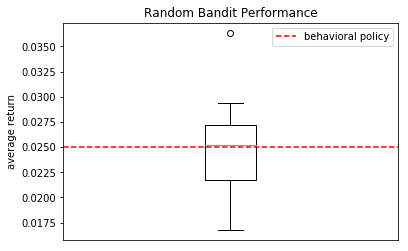

In [6]:
%%time
random_bandit = RandomBandit(item_pool)
random_avg_returns, Ts = evaluate_bandit(random_bandit, recomms, N_EVALS)

pyplot.boxplot(random_avg_returns)
pyplot.xticks([])
pyplot.axhline(behavior_perf, ls='dashed', c='red', label='behavioral policy')
pyplot.title('Random Bandit Performance')
pyplot.ylabel('average return')
pyplot.legend()
pyplot.savefig('img/random-bandit.pdf')

Text(0.5,1,'Statistic of Matched Events')

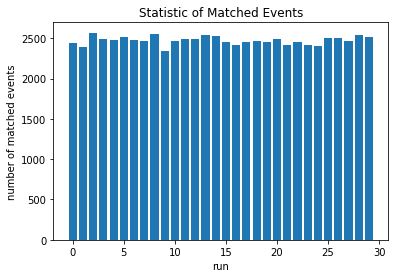

In [7]:
pyplot.bar(list(range(N_EVALS)), Ts)
pyplot.xlabel('run')
pyplot.ylabel('number of matched events')
pyplot.title('Statistic of Matched Events')

In [8]:
print('Total number of events:', recomms.shape[0])

Total number of events: 2809326


## $\varepsilon$-greedy Bandit

CPU times: user 3h 35min 22s, sys: 34.2 s, total: 3h 35min 56s
Wall time: 3h 35min 54s


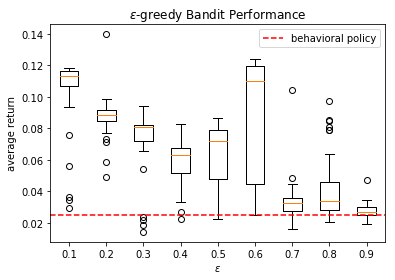

In [9]:
%%time
epsilons = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
epsilon_greedy_avg_returns = numpy.zeros((len(epsilons), N_EVALS))
Ts = numpy.zeros((len(epsilons), N_EVALS))
for i, epsilon in enumerate(epsilons):
    epsilon_greedy_bandit = EpsilonGreedyBandit(epsilon, item_pool)
    epsilon_greedy_avg_returns[i], Ts[i] = evaluate_bandit(
        epsilon_greedy_bandit, recomms, N_EVALS
    )

pyplot.boxplot(epsilon_greedy_avg_returns.T)
pyplot.xticks(range(1, len(epsilons) + 1), epsilons)
pyplot.axhline(behavior_perf, ls='dashed', c='red', label='behavioral policy')
pyplot.title(r'$\varepsilon$-greedy Bandit Performance')
pyplot.xlabel(r'$\varepsilon$')
pyplot.ylabel('average return')
pyplot.legend()
pyplot.savefig('img/epsilon-greedy-bandit.pdf')

Text(0.5,1,'Statistic of Matched Events')

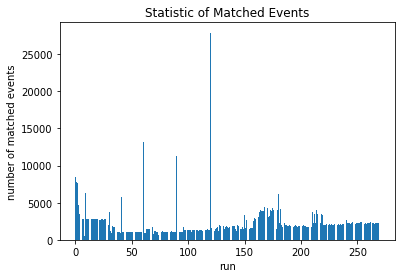

In [10]:
pyplot.bar(list(range(N_EVALS * len(epsilons))), Ts.flatten())
pyplot.xlabel('run')
pyplot.ylabel('number of matched events')
pyplot.title('Statistic of Matched Events')